In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
# tu są moduły do regresji liniowej
import sklearn.linear_model as linear_model
# tu są moduły dla miar błędów (np. miary kwadratowe)
import sklearn.metrics as metrics
# tutaj są dane
import sklearn.datasets as datasets

In [5]:
boston = datasets.load_boston()

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [12]:
# tworzymy sobie macierz X które objaśniaja Y
X = pd.DataFrame( boston.data, columns = boston.feature_names )

In [14]:
# podejrzymy sobie jak wyglądają dane 
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [16]:
# teraz sobie zrobimy zmienną y - wartości objaśniane
Y = boston.target
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.4 KB


In [20]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
X.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.6,8.6,0.0,0.1,0.3,3.6,89.0
ZN,506.0,11.4,23.3,0.0,0.0,0.0,12.5,100.0
INDUS,506.0,11.1,6.9,0.5,5.2,9.7,18.1,27.7
CHAS,506.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
NOX,506.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
RM,506.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
AGE,506.0,68.6,28.1,2.9,45.0,77.5,94.1,100.0
DIS,506.0,3.8,2.1,1.1,2.1,3.2,5.2,12.1
RAD,506.0,9.5,8.7,1.0,4.0,5.0,24.0,24.0
TAX,506.0,408.2,168.5,187.0,279.0,330.0,666.0,711.0


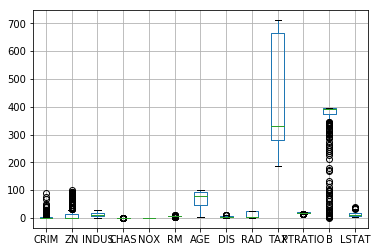

In [23]:
# prosty wykres skrzynkowy
X.boxplot()

In [27]:
# zobaczmy sobie korelację poszczególnych zmiennych
X.corr("pearson")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Teraz zaczynamy właściwe dopasowanie REGRSJI

In [28]:
#budujemy model
model = linear_model.LinearRegression()

In [31]:
# dopasowujemy model do danych
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# popatrzmy sobie na współczynniki które zostały dopasowane
coef= model.coef_
coef

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [38]:
# zobaczmy sobie te współczynniki w bardziej zjadliwej formie
# czyli współczynniki B które wyliczył dla dopasowania w tym modelu
pd.DataFrame( coef.tolist(), index = X.columns.tolist()).round(4)

,0
CRIM,-0.1072
ZN,0.0464
INDUS,0.0209
CHAS,2.6886
NOX,-17.7958
RM,3.8048
AGE,0.0008
DIS,-1.4758
RAD,0.3057
TAX,-0.0123


In [40]:
# teraz użyjemy PREDICT aby przewidzieć cene domu dla naszych zmiannych X
y_fitted=model.predict(X)

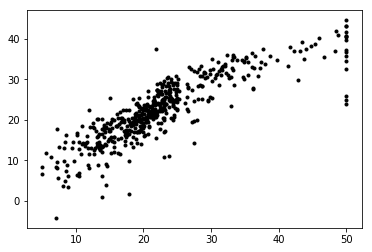

In [42]:
# teraz sobie podejrzymy jak zależne są wartości dopasowane do faktycznych wartości
plt.plot(Y, y_fitted, 'k.')

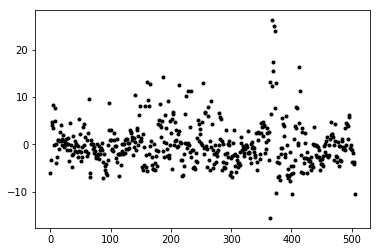

In [46]:
# teraz sobie policzymy błędy - jak bardzo różnią się te dane z modelu do rzeczywistych
e = Y - y_fitted

# na obrazku widać że te błędy oscylują wokół zera, to znaczy że jest dobrze i model jest z grubsza dopasowany
# czyli model regresji liniowej bedzie raczej chyba OK
plt.plot(e, 'k.')

# miary błędów i dopasowania modelu

In [47]:
# współczynnik determinacji R2 (kwadrat) - im bliżej 1 tym lepiej
metrics.r2_score(Y,y_fitted)

0.7406077428649428

In [48]:
# błąd średniokwadratowy
metrics.mean_squared_error(Y,y_fitted)

21.897779217687496

In [49]:
# mean absolute error - średnia z modułu błędów
metrics.mean_absolute_error(Y,y_fitted)

3.272944637996936

In [50]:
# median absolute error
metrics.median_absolute_error(Y,y_fitted)

2.4559464328034544

# Próba testowa ucząca

In [55]:
import sklearn.model_selection as model_selection

In [89]:
# ta funkcja dzieli nam zbiory X,Y na dwa (w sumie 4) podzbiory - uczący + testowy. Testowy będzie miał 20% - 0.2
x_ucz, x_test, y_ucz, y_test = model_selection.train_test_split( X, Y, test_size = 0.2)

In [62]:
x_ucz.shape, x_test.shape

((404, 13), (102, 13))

To teraz nauczmy model2 na danych x_ucz  -  y_ucz

In [87]:
# To teraz nauczmy model2 na danych x_ucz/y_ucz
model_2 = linear_model.LinearRegression()
model_2.fit(x_ucz,y_ucz)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# to teraz sobie przetestujmy model - ALE na DANYCH testowych !!!
y_test_pred = model_2.predict(x_test)

# i zobaczmy sobie miary
print(metrics.mean_squared_error(y_test,y_test_pred))
print(metrics.mean_absolute_error(y_test,y_test_pred))
print(metrics.median_absolute_error(y_test,y_test_pred))

14.187696543706183
2.9200198489597677
2.324559168202865


In [70]:
# terz sobie porónajmy te miary - ale na danych uczących
y_ucz_pred = model_2.predict(x_ucz)
print(metrics.mean_squared_error(y_ucz,y_ucz_pred))
print(metrics.mean_absolute_error(y_ucz,y_ucz_pred))
print(metrics.median_absolute_error(y_ucz,y_ucz_pred))

# miary wyglądają podobnie - nie ma skoków o rząd wielkości - to raczej wygląda OK 

23.993917302366295
3.4191594525696476
2.5899109805497282


Kroswalidacjka k-krotna

In [76]:
## przykład (taki testowy) - krosswalidacja k-krotna
for ucz, test in model_selection.KFold(n_splits =3).split(range(6)):
    print( ucz, test )

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


In [95]:
# teraz to samo co z przykłądu powyżej ale dla naszych danych

# zróbmy sobie funkcję pomocniczą do krosswalidacji żeby się nie potarzać

def fit_regression(x_ucz, y_ucz, x_test, y_test):
   """
   Ocena modelu regresji przy uzyciu podzialu na zbior uczacy i testowy
   Argumenty: x_ucz, y_ucz, x_test, y_test
   """
   r = linear_model.LinearRegression()
   r.fit(x_ucz, y_ucz)
   y_test_pred = r.predict(x_test)
   y_ucz_fitted = r.predict(x_ucz)

   return {
       "r2": metrics.r2_score(y_ucz_fitted, y_ucz),
       "mse_u": metrics.mean_squared_error(y_ucz, y_ucz_fitted),
       "mse_t": metrics.mean_squared_error(y_test, y_test_pred),
       "mae_u": metrics.mean_absolute_error(y_ucz, y_ucz_fitted),
       "mae_t": metrics.mean_absolute_error(y_test, y_test_pred)
   }


In [101]:
# zrobimy sobie podział - krosswalidacja 5-cio krotna
x = X
kf = model_selection.KFold(n_splits = 5)
results = [] # lista przechowujaca wyniki
for ucz, test in kf.split(x):
   x_ucz, y_ucz = x.iloc[ucz, :], y[ucz]
   x_test, y_test = x.iloc[test, :], y[test]
   #print(x_ucz.shape, x_test.shape)
   #print(y_ucz.shape, y_test.shape)
   ret = fit_regression(x_ucz, y_ucz, x_test, y_test)
   results.append(ret)
    
results

[{'r2': 0.6604656653939236,
  'mse_u': 24.58896264422673,
  'mse_t': 12.48065021226018,
  'mae_u': 3.555830885327738,
  'mae_t': 2.624695238235583},
 {'r2': 0.6256520975951139,
  'mse_u': 22.242069028127208,
  'mse_t': 26.096202669735117,
  'mae_u': 3.297921397127388,
  'mae_t': 3.9124481745981234},
 {'r2': 0.5612144712211509,
  'mse_u': 21.1870426640592,
  'mse_t': 33.11995587269343,
  'mae_u': 3.202461195545311,
  'mae_t': 4.38945068157969},
 {'r2': 0.8120857501211811,
  'mse_u': 12.917454336110817,
  'mse_t': 80.83305377869928,
  'mae_u': 2.743566487671876,
  'mae_t': 5.573663772640524},
 {'r2': 0.6402981854595022,
  'mse_u': 22.737189343488662,
  'mse_t': 33.58435565230247,
  'mae_u': 3.3068992102282735,
  'mae_t': 4.782612366965503}]

# Zróbmy sobie teras krosswalidację LeaveOneOut

In [104]:
# zrobimy sobie podział - krosswalidacja 5-cio krotna
x = X
kf = model_selection.LeaveOneOut()
results2 = [] # lista przechowujaca wyniki
for ucz, test in kf.split(x):
   x_ucz, y_ucz = x.iloc[ucz, :], y[ucz]
   x_test, y_test = x.iloc[test, :], y[test]
   #print(x_ucz.shape, x_test.shape)
   #print(y_ucz.shape, y_test.shape)
   ret = fit_regression(x_ucz, y_ucz, x_test, y_test)
   results2.append(ret)
   
# policzmy sobie średnią z tych wszystkich wyników
pd.DataFrame(results2).mean(axis=0)

mae_t     3.384945
mae_u     3.272912
mse_t    23.729258
mse_u    21.896019
r2        0.649789
dtype: float64